In [0]:
import pyspark
from pyspark.sql import *

In [0]:
spark = SparkSession.builder.appName("pyspark_dataset_1").getOrCreate()

In [0]:
spark

Out[4]:

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.1.0 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
df_spark = spark.read.csv("dbfs:/FileStore/shared_uploads/akshay.boddhul@fissionlabs.com/train-4.csv", header = True, inferSchema = True)

In [0]:
df_spark.show(10)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
PassengerId|Survived|Pclass| Name| Sex| Age|SibSp|Parch| Ticket| Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
 1| 0| 3|Braund, Mr. Owen ...| male|22.0| 1| 0| A/5 21171| 7.25| null| S|
 2| 1| 1|Cumings, Mrs. Joh...|female|38.0| 1| 0| PC 17599|71.2833| C85| C|
 3| 1| 3|Heikkinen, Miss. ...|female|26.0| 0| 0|STON/O2. 3101282| 7.925| null| S|
 4| 1| 1|Futrelle, Mrs. Ja...|female|35.0| 1| 0| 113803| 53.1| C123| S|
 5| 0| 3|Allen, Mr. Willia...| male|35.0| 0| 0| 373450| 8.05| null| S|
 6| 0| 3| Moran, Mr. James| male|null| 0| 0| 330877| 8.4583| null| Q|
 7| 0| 1|McCarthy, Mr. Tim...| male|54.0| 0| 0| 17463|51.8625| E46| S|
 8| 0| 3|Palsson, Master. ...| male| 2.0| 3| 1| 349909| 21.075| null| S|
 9| 1| 3|Johnson, Mrs. Osc...|female|27.0| 0| 2| 347742|11.1333| null| S|
 10| 1| 2|Nasser, Mrs. Nich...|female|14.0| 1| 0| 237736|30.0708| null| C|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
only showing top 10 rows

In [0]:
df_spark.filter( (df_spark.Sex == 'female') & (df_spark.Survived == 1) ).select("Name").show()

+--------------------+
 Name|
+--------------------+
Cumings, Mrs. Joh...|
Heikkinen, Miss. ...|
Futrelle, Mrs. Ja...|
Johnson, Mrs. Osc...|
Nasser, Mrs. Nich...|
Sandstrom, Miss. ...|
Bonnell, Miss. El...|
Hewlett, Mrs. (Ma...|
Masselmani, Mrs. ...|
"McGowan, Miss. A...|
Asplund, Mrs. Car...|
"O'Dwyer, Miss. E...|
Spencer, Mrs. Wil...|
Glynn, Miss. Mary...|
Nicola-Yarred, Mi...|
Laroche, Miss. Si...|
Devaney, Miss. Ma...|
O'Driscoll, Miss....|
Harper, Mrs. Henr...|
Faunthorpe, Mrs. ...|
+--------------------+
only showing top 20 rows

In [0]:
df_spark.filter( (df_spark.Sex == 'female') & (df_spark.Survived == 1) ).count()

Out[8]: 233

In [0]:
passenger_fare = df_spark.groupBy(df_spark["Pclass"])
passenger_fare.mean("Fare").show()

+------+------------------+
Pclass| avg(Fare)|
+------+------------------+
 1| 84.15468749999992|
 3|13.675550101832997|
 2| 20.66218315217391|
+------+------------------+

In [0]:
young_grp = df_spark.filter( (df_spark.Age >= 1) & (df_spark.Age < 30) & (df_spark.Survived == 1)).sort("Age")
young_grp.show()

+-----------+--------+------+--------------------+------+---+-----+-----+---------------+-------+-----+--------+
PassengerId|Survived|Pclass| Name| Sex|Age|SibSp|Parch| Ticket| Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+---+-----+-----+---------------+-------+-----+--------+
 382| 1| 3|"Nakid, Miss. Mar...|female|1.0| 0| 2| 2653|15.7417| null| C|
 173| 1| 3|Johnson, Miss. El...|female|1.0| 1| 1| 347742|11.1333| null| S|
 789| 1| 3|Dean, Master. Ber...| male|1.0| 1| 2| C.A. 2315| 20.575| null| S|
 184| 1| 2|Becker, Master. R...| male|1.0| 2| 1| 230136| 39.0| F4| S|
 828| 1| 2|Mallet, Master. A...| male|1.0| 0| 2|S.C./PARIS 2079|37.0042| null| C|
 341| 1| 2|Navratil, Master....| male|2.0| 1| 1| 230080| 26.0| F2| S|
 480| 1| 3|Hirvonen, Miss. H...|female|2.0| 0| 1| 3101298|12.2875| null| S|
 531| 1| 2|Quick, Miss. Phyl...|female|2.0| 1| 1| 26360| 26.0| null| S|
 44| 1| 2|Laroche, Miss. Si...|female|3.0| 1| 2| SC/Paris 2123|41.5792| null| C|
 262| 1| 3|Asplund, Master. ...| male|3.0| 4| 2| 347077|31.3875| null| S|
 194| 1| 2|Navratil, Master....| male|3.0| 1| 1| 230080| 26.0| F2| S|
 408| 1| 2|Richards, Master....| male|3.0| 1| 1| 29106| 18.75| null| S|
 349| 1| 3|"Coutts, Master. ...| male|3.0| 1| 1| C.A. 37671| 15.9| null| S|
 11| 1| 3|Sandstrom, Miss. ...|female|4.0| 1| 1| PP 9549| 16.7| G6| S|
 185| 1| 3|Kink-Heilmann, Mi...|female|4.0| 0| 2| 315153| 22.025| null| S|
 619| 1| 2|Becker, Miss. Mar...|female|4.0| 2| 1| 230136| 39.0| F4| S|
 446| 1| 1|Dodge, Master. Wa...| male|4.0| 0| 2| 33638|81.8583| A34| S|
 692| 1| 3| Karun, Miss. Manca|female|4.0| 0| 1| 349256|13.4167| null| C|
 870| 1| 3|Johnson, Master. ...| male|4.0| 1| 1| 347742|11.1333| null| S|
 751| 1| 2| Wells, Miss. Joan|female|4.0| 1| 1| 29103| 23.0| null| S|
+-----------+--------+------+--------------------+------+---+-----+-----+---------------+-------+-----+--------+
only showing top 20 rows

In [0]:
middle_grp = df_spark.filter( (df_spark.Age >= 30) & (df_spark.Age < 45) & (df_spark.Survived == 1)).sort("Age")
middle_grp.show()

+-----------+--------+------+--------------------+------+----+-----+-----+-----------------+--------+-----+--------+
PassengerId|Survived|Pclass| Name| Sex| Age|SibSp|Parch| Ticket| Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+-----------------+--------+-----+--------+
 80| 1| 3|Dowdell, Miss. El...|female|30.0| 0| 0| 364516| 12.475| null| S|
 323| 1| 2|Slayter, Miss. Hi...|female|30.0| 0| 0| 234818| 12.35| null| Q|
 521| 1| 1|Perreault, Miss. ...|female|30.0| 0| 0| 12749| 93.5| B73| S|
 287| 1| 3|de Mulder, Mr. Th...| male|30.0| 0| 0| 345774| 9.5| null| S|
 538| 1| 1| LeRoy, Miss. Bertha|female|30.0| 0| 0| PC 17761| 106.425| null| C|
 727| 1| 2|Renouf, Mrs. Pete...|female|30.0| 3| 0| 31027| 21.0| null| S|
 310| 1| 1|Francatelli, Miss...|female|30.0| 0| 0| PC 17485| 56.9292| E36| C|
 748| 1| 2|Sinkkonen, Miss. ...|female|30.0| 0| 0| 250648| 13.0| null| S|
 843| 1| 1|Serepeca, Miss. A...|female|30.0| 0| 0| 113798| 31.0| null| C|
 258| 1| 1|Cherry, Miss. Gladys|female|30.0| 0| 0| 110152| 86.5| B77| S|
 319| 1| 1|Wick, Miss. Mary ...|female|31.0| 0| 2| 36928|164.8667| C7| S|
 674| 1| 2|Wilhelms, Mr. Cha...| male|31.0| 0| 0| 244270| 13.0| null| S|
 329| 1| 3|Goldsmith, Mrs. F...|female|31.0| 1| 1| 363291| 20.525| null| S|
 802| 1| 2|Collyer, Mrs. Har...|female|31.0| 1| 1| C.A. 31921| 26.25| null| S|
 691| 1| 1|Dick, Mr. Albert ...| male|31.0| 1| 0| 17474| 57.0| B20| S|
 216| 1| 1|Newell, Miss. Mad...|female|31.0| 1| 0| 35273| 113.275| D36| C|
 798| 1| 3| Osman, Mrs. Mara|female|31.0| 0| 0| 349244| 8.6833| null| S|
 745| 1| 3| Stranden, Mr. Juho| male|31.0| 0| 0|STON/O 2. 3101288| 7.925| null| S|
 219| 1| 1|Bazzani, Miss. Al...|female|32.0| 0| 0| 11813| 76.2917| D15| C|
 580| 1| 3| Jussila, Mr. Eiriik| male|32.0| 0| 0|STON/O 2. 3101286| 7.925| null| S|
+-----------+--------+------+--------------------+------+----+-----+-----+-----------------+--------+-----+--------+
only showing top 20 rows

In [0]:
old_grp = df_spark.filter( (df_spark.Age >= 45) & (df_spark.Survived == 1)).sort("Age")
old_grp.show()

+-----------+--------+------+--------------------+------+----+-----+-----+------------+--------+-------+--------+
PassengerId|Survived|Pclass| Name| Sex| Age|SibSp|Parch| Ticket| Fare| Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+------------+--------+-------+--------+
 441| 1| 2|Hart, Mrs. Benjam...|female|45.0| 1| 1|F.C.C. 13529| 26.25| null| S|
 188| 1| 1|"Romaine, Mr. Cha...| male|45.0| 0| 0| 111428| 26.55| null| S|
 707| 1| 2|"Kelly, Mrs. Flor...|female|45.0| 0| 0| 223596| 13.5| null| S|
 339| 1| 3|Dahl, Mr. Karl Ed...| male|45.0| 0| 0| 7598| 8.05| null| S|
 857| 1| 1|Wick, Mrs. George...|female|45.0| 1| 1| 36928|164.8667| null| S|
 872| 1| 1|Beckwith, Mrs. Ri...|female|47.0| 1| 1| 11751| 52.5542| D35| S|
 755| 1| 2|Herman, Mrs. Samu...|female|48.0| 1| 2| 220845| 65.0| null| S|
 557| 1| 1|"Duff Gordon, Lad...|female|48.0| 1| 0| 11755| 39.6| A16| C|
 713| 1| 1|Taylor, Mr. Elmer...| male|48.0| 1| 0| 19996| 52.0| C126| S|
 461| 1| 1| Anderson, Mr. Harry| male|48.0| 0| 0| 19952| 26.55| E12| S|
 863| 1| 1|Swift, Mrs. Frede...|female|48.0| 0| 0| 17466| 25.9292| D17| S|
 646| 1| 1|Harper, Mr. Henry...| male|48.0| 1| 0| PC 17572| 76.7292| D33| C|
 454| 1| 1|Goldenberg, Mr. S...| male|49.0| 1| 0| 17453| 89.1042| C92| C|
 53| 1| 1|Harper, Mrs. Henr...|female|49.0| 1| 0| PC 17572| 76.7292| D33| C|
 600| 1| 1|"Duff Gordon, Sir...| male|49.0| 1| 0| PC 17485| 56.9292| A20| C|
 797| 1| 1|Leader, Dr. Alice...|female|49.0| 0| 0| 17465| 25.9292| D17| S|
 260| 1| 2|Parrish, Mrs. (Lu...|female|50.0| 0| 1| 230433| 26.0| null| S|
 459| 1| 2| Toomey, Miss. Ellen|female|50.0| 0| 0|F.C.C. 13531| 10.5| null| S|
 661| 1| 1|Frauenthal, Dr. H...| male|50.0| 2| 0| PC 17611| 133.65| null| S|
 300| 1| 1|Baxter, Mrs. Jame...|female|50.0| 0| 1| PC 17558|247.5208|B58 B60| C|
+-----------+--------+------+--------------------+------+----+-----+-----+------------+--------+-------+--------+
only showing top 20 rows

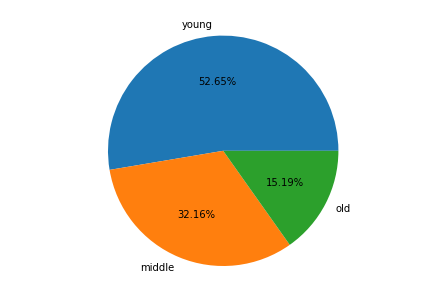

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.axis('equal')

age_group = ["young","middle","old"]

passengers = [young_grp.select("PassengerId").count(),middle_grp.select("PassengerId").count(),old_grp.select("PassengerId").count()]

ax.pie(passengers, labels = age_group,autopct='%1.2f%%')

plt.show()

In [0]:
### PySpark SQL

In [0]:
df_spark.createOrReplaceTempView("titanic_table")

In [0]:
spark.sql("SELECT * FROM titanic_table LIMIT 20").show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
PassengerId|Survived|Pclass| Name| Sex| Age|SibSp|Parch| Ticket| Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
 1| 0| 3|Braund, Mr. Owen ...| male|22.0| 1| 0| A/5 21171| 7.25| null| S|
 2| 1| 1|Cumings, Mrs. Joh...|female|38.0| 1| 0| PC 17599|71.2833| C85| C|
 3| 1| 3|Heikkinen, Miss. ...|female|26.0| 0| 0|STON/O2. 3101282| 7.925| null| S|
 4| 1| 1|Futrelle, Mrs. Ja...|female|35.0| 1| 0| 113803| 53.1| C123| S|
 5| 0| 3|Allen, Mr. Willia...| male|35.0| 0| 0| 373450| 8.05| null| S|
 6| 0| 3| Moran, Mr. James| male|null| 0| 0| 330877| 8.4583| null| Q|
 7| 0| 1|McCarthy, Mr. Tim...| male|54.0| 0| 0| 17463|51.8625| E46| S|
 8| 0| 3|Palsson, Master. ...| male| 2.0| 3| 1| 349909| 21.075| null| S|
 9| 1| 3|Johnson, Mrs. Osc...|female|27.0| 0| 2| 347742|11.1333| null| S|
 10| 1| 2|Nasser, Mrs. Nich...|female|14.0| 1| 0| 237736|30.0708| null| C|
 11| 1| 3|Sandstrom, Miss. ...|female| 4.0| 1| 1| PP 9549| 16.7| G6| S|
 12| 1| 1|Bonnell, Miss. El...|female|58.0| 0| 0| 113783| 26.55| C103| S|
 13| 0| 3|Saundercock, Mr. ...| male|20.0| 0| 0| A/5. 2151| 8.05| null| S|
 14| 0| 3|Andersson, Mr. An...| male|39.0| 1| 5| 347082| 31.275| null| S|
 15| 0| 3|Vestrom, Miss. Hu...|female|14.0| 0| 0| 350406| 7.8542| null| S|
 16| 1| 2|Hewlett, Mrs. (Ma...|female|55.0| 0| 0| 248706| 16.0| null| S|
 17| 0| 3|Rice, Master. Eugene| male| 2.0| 4| 1| 382652| 29.125| null| Q|
 18| 1| 2|Williams, Mr. Cha...| male|null| 0| 0| 244373| 13.0| null| S|
 19| 0| 3|Vander Planke, Mr...|female|31.0| 1| 0| 345763| 18.0| null| S|
 20| 1| 3|Masselmani, Mrs. ...|female|null| 0| 0| 2649| 7.225| null| C|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+

In [0]:
spark.sql("SELECT Name FROM titanic_table WHERE Sex = 'female' AND Survived = 1").show()

+--------------------+
 Name|
+--------------------+
Cumings, Mrs. Joh...|
Heikkinen, Miss. ...|
Futrelle, Mrs. Ja...|
Johnson, Mrs. Osc...|
Nasser, Mrs. Nich...|
Sandstrom, Miss. ...|
Bonnell, Miss. El...|
Hewlett, Mrs. (Ma...|
Masselmani, Mrs. ...|
"McGowan, Miss. A...|
Asplund, Mrs. Car...|
"O'Dwyer, Miss. E...|
Spencer, Mrs. Wil...|
Glynn, Miss. Mary...|
Nicola-Yarred, Mi...|
Laroche, Miss. Si...|
Devaney, Miss. Ma...|
O'Driscoll, Miss....|
Harper, Mrs. Henr...|
Faunthorpe, Mrs. ...|
+--------------------+
only showing top 20 rows

In [0]:
spark.sql("SELECT Pclass, AVG(Fare) AS Average_Fare FROM titanic_table GROUP BY Pclass").show()

+------+------------------+
Pclass| Average_Fare|
+------+------------------+
 1| 84.15468749999992|
 3|13.675550101832997|
 2| 20.66218315217391|
+------+------------------+

In [0]:
spark.sql("""
            WITH young_group AS (
                SELECT * FROM titanic_table
                WHERE Age < 30 AND Survived = 1
            )
            SELECT Sex, COUNT(1) AS Count FROM young_group
            GROUP BY Sex
          """).show()

+------+-----+
 Sex|Count|
+------+-----+
female| 105|
 male| 51|
+------+-----+

In [0]:
spark.sql("""
            WITH middle_group AS (
                SELECT * FROM titanic_table
                WHERE Age BETWEEN 30 AND 45 AND Survived = 1
            )
            SELECT Sex, COUNT(1) AS Count FROM middle_group
            GROUP BY Sex
          """).show()

+------+-----+
 Sex|Count|
+------+-----+
female| 66|
 male| 30|
+------+-----+

In [0]:
spark.sql("""
            WITH old_group AS (
                SELECT * FROM titanic_table
                WHERE Age >= 45 AND Survived = 1
            )
            SELECT Sex, COUNT(1) AS Count FROM old_group
            GROUP BY Sex
          """).show()

+------+-----+
 Sex|Count|
+------+-----+
female| 29|
 male| 14|
+------+-----+